In [280]:
#import required libraries
import numpy as np #for dealing high dimentional data
import pandas as pd #to do statistical data analysis
import matplotlib.pyplot as plt #for 2Dvisualization
import seaborn as sns #High end data visualisation

In [281]:


# Read the dataset
dataset = pd.read_csv(r"C:\Users\tinku2196\OneDrive\Desktop\Project\FLOOD.csv")


Axes(0.125,0.11;0.775x0.77)


C:\Users\tinku2196\AppData\Local\Temp\ipykernel_14520\2872932435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(dataset['Temp']))


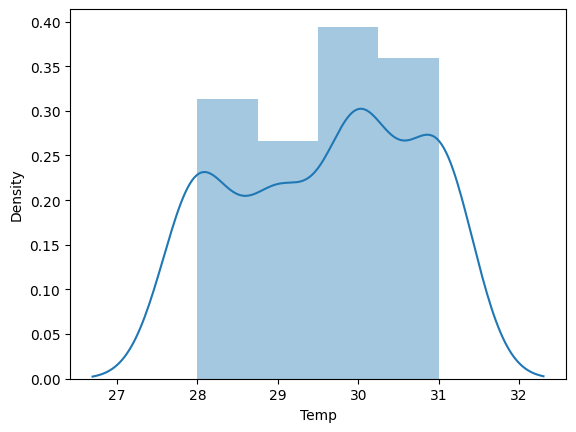

In [282]:
print(sns.distplot(dataset['Temp']))

Axes(0.125,0.11;0.775x0.77)

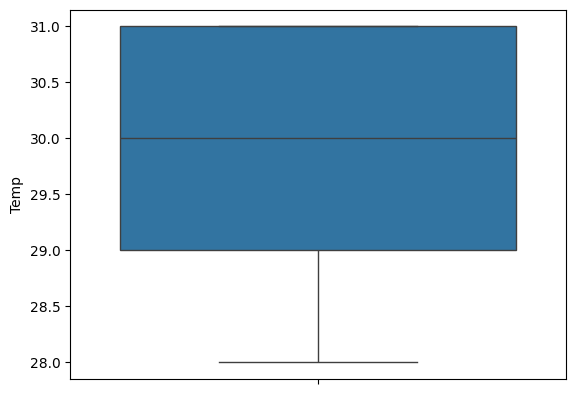

In [283]:
print(sns.boxplot(dataset['Temp']))

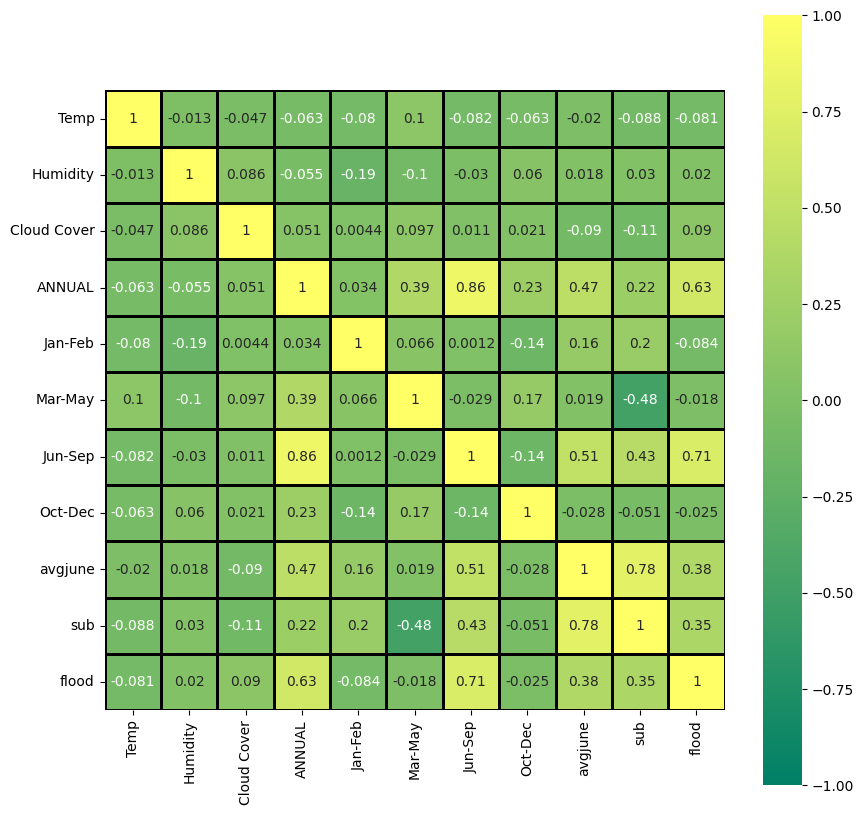

In [284]:
import seaborn as sns
fig=plt.gcf()
fig.set_size_inches(10,10)
fig=sns.heatmap(dataset.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin= -1,vmax=1, cbar_kws={"orientation": "vertical"},cbar=True)

In [285]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB
None


In [286]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,115.0,29.600000,1.122341,28.0,29.000000,30.000000,31.000000,31.000000
Humidity,115.0,73.852174,2.947623,70.0,71.000000,74.000000,76.000000,79.000000
Cloud Cover,115.0,36.286957,4.330158,30.0,32.500000,36.000000,40.000000,44.000000
ANNUAL,115.0,2925.487826,422.112193,2068.8,2627.900000,2937.500000,3164.100000,4257.800000
Jan-Feb,115.0,27.739130,22.361032,0.3,10.250000,20.500000,41.600000,98.100000
Mar-May,115.0,377.253913,151.091850,89.9,276.750000,342.000000,442.300000,915.200000
Jun-Sep,115.0,2022.840870,386.254397,1104.3,1768.850000,1948.700000,2242.900000,3451.300000
Oct-Dec,115.0,497.636522,129.860643,166.6,407.450000,501.500000,584.550000,823.300000
avgjune,115.0,218.100870,62.547597,65.6,179.666667,211.033333,263.833333,366.066667
sub,115.0,439.801739,210.438813,34.2,295.000000,430.600000,577.650000,982.700000


In [287]:
dataset.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [288]:
#checking null values
dataset.isnull().any()

Temp           False
Humidity       False
Cloud Cover    False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
avgjune        False
sub            False
flood          False
dtype: bool

In [289]:
#independent features
x=dataset.iloc[:,2:7].values

In [290]:
#dependent features
y=dataset.iloc[:,9:].values

In [291]:
#split the data into train and test set from our x and y
#import train_test_split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [292]:
#import Standardscaler
from sklearn.preprocessing import StandardScaler
#creare object to Standardscaler class
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [293]:
#import dump class from joblib
from joblib import dump
dump(sc,"transform.save")

['transform.save']

In [294]:
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
import xgboost

In [295]:
dtree = tree.DecisionTreeClassifier()
Rf = ensemble.RandomForestClassifier()
knn = neighbors.KNeighborsClassifier()
xgb = xgboost.XGBClassifier()

In [296]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)

In [297]:
xg_cla = xgboost.XGBClassifier(objective ='reg:linear',learning_rate = 0.1,max_depth = 5, n_estimators = 10)

In [298]:
xg_cla.fit(x_train,y_train)

c:\Users\tinku2196\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:11:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='reg:linear', ...)

In [299]:
dtree.fit(x_train, y_train)
Rf.fit(x_train, y_train)
knn.fit(x_train, y_train)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [300]:
from sklearn import metrics

In [301]:
y_test = ['Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep']
p1 = ['Cloud Cover', 'Annual Rainfall', 'Jan-Feb Rainfall', 'Mar-May Rainfall', 'Jun-Sep Rainfall']

In [302]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Read the dataset
data = pd.read_csv(r"C:\Users\tinku2196\OneDrive\Desktop\Project\FLOOD.csv")  # Replace with the actual file path

# Extract the true labels (y_test) from the "flood" column
y_test = data["flood"]

# Extract the features used for prediction
x = data.drop(columns=["flood"])  # Assuming "flood" is the target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_test, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions with the model for p1, p2, p3, and p4
p1 = model.predict(x_test)
p2 = model.predict(x_test)
p3 = model.predict(x_test)
p4 = model.predict(x_test)

# Calculate the accuracy for each set of predictions
accuracy_p1 = metrics.accuracy_score(y_test, p1)
accuracy_p2 = metrics.accuracy_score(y_test, p2)
accuracy_p3 = metrics.accuracy_score(y_test, p3)
accuracy_p4 = metrics.accuracy_score(y_test, p4)

print("Accuracy for p1:", accuracy_p1)
print("Accuracy for p2:", accuracy_p2)
print("Accuracy for p3:", accuracy_p3)
print("Accuracy for p4:", accuracy_p4)


Accuracy for p1: 0.9565217391304348
Accuracy for p2: 0.9565217391304348
Accuracy for p3: 0.9565217391304348
Accuracy for p4: 0.9565217391304348


c:\Users\tinku2196\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [303]:
metrics.confusion_matrix(y_test,p4)

array([[20,  0],
       [ 1,  2]], dtype=int64)

In [304]:
print(metrics.accuracy_score(y_test,p4))

0.9565217391304348


In [305]:
print(metrics.precision_score(y_test,p4))

1.0


In [306]:
print(metrics.recall_score(y_test,p4))

0.6666666666666666


In [307]:
from joblib import dump
dump(xg_cla,'floods.save')

['floods.save']